<img src="https://mma.prnewswire.com/media/1200045/Riiid_Labs.jpg?p=publish&w=600" width="600" height="600">

## <center>Linear Regression from Scratch to Predict House Price </center>

[Msc. Diego Hurtado](https://www.linkedin.com/in/diegohurtadoo/)

# Table of contents <a id='0.1'></a>

* [Import Packages](#1)
    * [Custom classes](#1.1)
* [Introduction](#2)
* [Data Overview](#3)
    * [Dataset Mexico](#3.1)
        * [Health](#3.1.1)

# 1. <a id='1'>Import Packages📚</a>
[Table of contents](#0.1)

In [1]:
#package for scientific computing in Python.
import numpy as np

import warnings

#for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.express as px

warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# 1.1 <a id='1.1'>Custom clases🔍</a>
[Table of contents](#0.1)

In [354]:
class Components():
    def __init__(self):
        self.width = 960
        self.height = 600
        self.bg_color = '#FFFFFF'
        self.paper_bg = '#FFFFFF'
        self.font_family = '"McKinsey Sans", "Helvetica Neue", Calibri, Corbel, Helvetica, Roboto, Droid, sans-serif'
        self.font_color = '#061b2c'
        self.title_font_family = '"McKinsey Sans", "Helvetica Neue", Calibri, Corbel, Helvetica, Roboto, Droid, sans-serif'
        self.title_font_color = '#061b2c'
        self.title_font_size = 21
        self.marker_color = '#057ab1'
        self.linecolor = '#061b2c'
        self.font_size = 15
        self.linewidth = 2
        
    def get_surface(self, x, y, z, x_txt, y_txt, z_txt, title):
    
        fig = go.Figure(go.Surface(
            x = x,
            y = y,
            z = z
        ))
        
        fig.update_layout(
                                   title = title,
        )
        
        fig.update_layout(
                        margin = {'r': 0, 't': 60, 'l': 0, 'b': 40},
                        title = dict(
                                   font = dict(size=self.title_font_size, color = self.font_color), 
                                   x=0.45, 
                                   xanchor='center'
                        ),
                        plot_bgcolor = self.bg_color,
                        paper_bgcolor = self.paper_bg,
                        hoverdistance=2,
                        autosize=True,
                        font_color=self.font_color,
                        width=self.width, 
                        height=self.height,
                        font_family = self.font_family,
                        # title_font_family = self.font_family,
                        # title_font_color = self.font_color,
                        # legend_title_font_color = self.font_color
                        font=dict(
                            # family="Courier New, monospace",
                            size=self.font_size,
                            color=self.font_color
                        )
        )
        


        fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                          highlightcolor="limegreen", project_z=True))


        fig.update_layout(
            scene = dict(
                            xaxis = dict(
                                title=x_txt,
                                backgroundcolor="rgb(200, 200, 230)",
                                gridcolor="white",
                                showbackground=True,
                                zerolinecolor="white",
                            ),
                            yaxis = dict(
                                title=y_txt,
                                backgroundcolor="rgb(200, 200, 230)",
                                gridcolor="white",
                                showbackground=True,
                                zerolinecolor="white"
                            ),
                            zaxis = dict(
                                title=z_txt,
                                backgroundcolor="rgb(200, 200, 230)",
                                gridcolor="white",
                                showbackground=True,
                                zerolinecolor="white"
                            ),
        )
        )

        return fig
        
    def get_scatter_(self, x, y, y_txt, x_txt):
    
        fig = go.Figure()
        
        fig.add_trace(
            go.Scatter(
                x=x, 
                y=y,
                mode='markers',
                name='Training data'
            )
        )
        
        fig.update_traces(
                marker=dict(
                color=self.marker_color)
        )
        
        fig.update_layout(
            legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ))
        
        fig.update_layout(
                # title = tittle_txt,
                xaxis_title = x_txt,
                yaxis_title = y_txt
        )

        fig.update_layout(
                xaxis=dict(
                    showline=True,
                    showgrid=False,
                    showticklabels=True,
                    linecolor=self.linecolor,
                    linewidth=self.linewidth,
                    ticks='outside',
                    tickfont=dict(
                        family=self.font_family,
                        size=self.font_size,
                        color=self.font_color,
                    ),
                ),
                yaxis=dict(
                    showgrid=False,
                    zeroline=False,
                    showticklabels=True,
                    linecolor=self.linecolor,
                    ticks='outside',
                    linewidth=self.linewidth,
                    tickfont=dict(
                        family=self.font_family,
                        size=self.font_size,
                        color=self.font_color,
                    ),
                ),
                autosize=False,
                showlegend=True,
        )


        fig.update_layout(
                        margin = {'r': 0, 't': 60, 'l': 0, 'b': 40},
                        title = dict(
                                   font = dict(size=self.title_font_size, color = self.font_color), 
                                   x=0.45, 
                                   xanchor='center'
                        ),
                        plot_bgcolor = self.bg_color,
                        paper_bgcolor = self.paper_bg,
                        hoverdistance=2,
                        autosize=True,
                        font_color=self.font_color,
                        width=self.width, 
                        height=self.height,
                        font_family = self.font_family,
                        # title_font_family = self.font_family,
                        # title_font_color = self.font_color,
                        # legend_title_font_color = self.font_color
                        font=dict(
                            # family="Courier New, monospace",
                            size=self.font_size,
                            color=self.font_color
                        )
        )
        


        return fig
    
    def get_linear_reg_chart(self, x, y, y_txt, x_txt):
    
        fig = go.Figure()
        
        fig.add_trace(
            go.Scatter(
                x=x, 
                y=y,
                mode='markers',
                name='Training data'
            )
        )
        
        fig.update_traces(
                marker=dict(
                color=self.marker_color)
        )
        
        
        fig.add_trace(go.Scatter(
            x=x,
            y=x,
            # name = '<b>No</b> Gaps', # Style name/legend entry with html tags
            # connectgaps=True # override default to connect the gaps
            name='Linear regression',
            line=dict(color='#3abdf3', width=4, 
                      # dash='dash'
            )
        ))
        
        fig.update_layout(
            legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ))
        
        fig.update_layout(
                # title = tittle_txt,
                xaxis_title = x_txt,
                yaxis_title = y_txt
        )

        fig.update_layout(
                xaxis=dict(
                    showline=True,
                    showgrid=False,
                    showticklabels=True,
                    linecolor=self.linecolor,
                    linewidth=self.linewidth,
                    ticks='outside',
                    tickfont=dict(
                        family=self.font_family,
                        size=self.font_size,
                        color=self.font_color,
                    ),
                ),
                yaxis=dict(
                    showgrid=False,
                    zeroline=False,
                    showticklabels=True,
                    linecolor=self.linecolor,
                    ticks='outside',
                    linewidth=self.linewidth,
                    tickfont=dict(
                        family=self.font_family,
                        size=self.font_size,
                        color=self.font_color,
                    ),
                ),
                autosize=False,
                showlegend=True,
        )


        fig.update_layout(
                        margin = {'r': 0, 't': 60, 'l': 0, 'b': 40},
                        title = dict(
                                   font = dict(size=self.title_font_size, color = self.font_color), 
                                   x=0.45, 
                                   xanchor='center'
                        ),
                        plot_bgcolor = self.bg_color,
                        paper_bgcolor = self.paper_bg,
                        hoverdistance=2,
                        autosize=True,
                        font_color=self.font_color,
                        width=self.width, 
                        height=self.height,
                        font_family = self.font_family,
                        # title_font_family = self.font_family,
                        # title_font_color = self.font_color,
                        # legend_title_font_color = self.font_color
                        font=dict(
                            # family="Courier New, monospace",
                            size=self.font_size,
                            color=self.font_color
                        )
        )
        


        return fig
    
    def get_contour(self, x, y, z, title, x_txt, y_txt):
        
        fig = go.Figure()

        # Add traces
        fig.add_trace(go.Scatter(x=theta[0], y=theta[1], mode='markers', marker_color='rgba(152, 0, 0, .8)', marker_size=10))

        fig.add_trace(
            go.Contour(
                z=J_vals.tolist(),
                x=theta0_vals.tolist(), # horizontal axis
                y=theta1_vals.tolist(), # vertical axis,
                contours_coloring='heatmap',
                colorbar=dict(
                    title=title, # title here
                    titleside='right',
                    titlefont=dict(
                        size=14,
                        family='Arial, sans-serif')
                )
            )

        )


        fig.update_layout(
                               title = title,
                               xaxis_title = x_txt,
                               yaxis_title = y_txt
        )

        fig.update_layout(
                        margin = {'r': 0, 't': 60, 'l': 0, 'b': 40},
                        title = dict(
                                   font = dict(size=self.title_font_size, color = self.font_color), 
                                   x=0.45, 
                                   xanchor='center'
                        ),
                        plot_bgcolor = self.bg_color,
                        paper_bgcolor = self.paper_bg,
                        hoverdistance=2,
                        autosize=True,
                        font_color=self.font_color,
                        width=self.width, 
                        height=self.height,
                        font_family = self.font_family,
                        # title_font_family = self.font_family,
                        # title_font_color = self.font_color,
                        # legend_title_font_color = self.font_color
                        font=dict(
                            # family="Courier New, monospace",
                            size=self.font_size,
                            color=self.font_color
                        )
        )

        return fig
    
    def get_scatter(self, x, y, tittle_txt, x_txt, y_txt):
    
        fig = go.Figure(data=go.Scatter(
            x=x, 
            y=y,
            name='markers',
            marker_color=self.marker_color,
            marker=dict(
                line_width=12
            )
        )
        )

        fig.update_traces(
                    marker=dict(
                    color=self.marker_color
                    )
        )

        fig.update_layout(
                                   title = tittle_txt,
                                   xaxis_title = x_txt,
                                   yaxis_title = y_txt
        )


        fig.update_layout(
                    xaxis=dict(
                        showline=True,
                        showgrid=False,
                        showticklabels=True,
                        linecolor=self.linecolor,
                        linewidth=self.linewidth,
                        ticks='outside',
                        tickfont=dict(
                            family=self.font_family,
                            size=self.font_size,
                            color=self.font_color,
                        ),
                    ),
                    yaxis=dict(
                        showgrid=False,
                        zeroline=False,
                        showticklabels=True,
                        linecolor=self.linecolor,
                        ticks='outside',
                        linewidth=self.linewidth,
                        tickfont=dict(
                            family=self.font_family,
                            size=self.font_size,
                            color=self.font_color,
                        ),
                    ),
                    autosize=False,
                    showlegend=False,
        )


        fig.update_layout(
                            margin = {'r': 0, 't': 60, 'l': 0, 'b': 40},
                            title = dict(
                                       font = dict(size=self.title_font_size, color = self.font_color), 
                                       x=0.45, 
                                       xanchor='center'
                            ),
                            plot_bgcolor = self.bg_color,
                            paper_bgcolor = self.paper_bg,
                            hoverdistance=2,
                            autosize=True,
                            font_color=self.font_color,
                            width=self.width, 
                            height=self.height,
                            font_family = self.font_family,
                            # title_font_family = self.font_family,
                            # title_font_color = self.font_color,
                            # legend_title_font_color = self.font_color
                            font=dict(
                                # family="Courier New, monospace",
                                size=self.font_size,
                                color=self.font_color
                            )
        )
        
        fig.update_layout(
            legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ))

        return fig
    
    def get_histogram_chart(self, df, x1, y2, l1, l2, tittle):
    
        colors = ['rgb(0, 0, 100)']


        fig = px.histogram(
                           df, 
                           x=x1, 
                           y=y2, 
                           # color="deaths",
                           marginal="box", # can be `box`, `violin` rug
                           hover_data=df.columns,
                           nbins=33,
                           opacity=0.75,
                           labels={x1:l1, y2:l2},
                           # histnorm='probability density',
                           # histfunc='avg'
                           log_y=False, # represent bars with log scale,
                           color_discrete_sequence=['#3abdf3'], # color of histogram bars,
                           text_auto = "outside",
                           # textposition="bottom center"
        )

        fig.update_layout(bargap=0.1)

        fig.update_layout(
                           title=tittle,
                           # xaxis_title='Diego O’HURTADO',
                           # yaxis_title='congestion'

        )


        fig.update_layout(
                xaxis=dict(
                    showline=True,
                    showgrid=False,
                    showticklabels=True,
                    linecolor=self.linecolor,
                    linewidth=self.linewidth,
                    ticks='outside',
                    tickfont=dict(
                        family=self.font_family,
                        size=self.font_size,
                        color=self.font_color,
                    ),
                ),
                yaxis=dict(
                    showgrid=False,
                    zeroline=False,
                    showticklabels=True,
                    linecolor=self.linecolor,
                    ticks='outside',
                    linewidth=self.linewidth,
                    tickfont=dict(
                        family=self.font_family,
                        size=self.font_size,
                        color=self.font_color,
                    ),
                ),
                autosize=False,
                showlegend=False,
        )


        fig.update_layout(
                        margin = {'r': 0, 't': 60, 'l': 0, 'b': 40},
                        title = dict(
                                   font = dict(size=self.title_font_size, color = self.font_color), 
                                   x=0.45, 
                                   xanchor='center'
                        ),
                        plot_bgcolor = self.bg_color,
                        paper_bgcolor = self.paper_bg,
                        hoverdistance=2,
                        autosize=True,
                        font_color=self.font_color,
                        width=self.width, 
                        height=self.height,
                        font_family = self.font_family,
                        # title_font_family = self.font_family,
                        # title_font_color = self.font_color,
                        # legend_title_font_color = self.font_color
                        font=dict(
                            # family="Courier New, monospace",
                            size=self.font_size,
                            color=self.font_color
                        )
        )

        fig.update_layout(uniformtext_minsize=14)

        fig.update_traces(textsrc='outside')


        return fig
        
    def get_scatterr(self, df, x, y, tittle_txt, x_txt, y_txt):
    
        fig = px.scatter(
            df, 
            x=x, y=y, 
            # color=x,
            marginal_x="box", marginal_y="violin", trendline="ols",
            width=self.width, 
            height=self.height
        )

        fig.update_layout(
                               title = tittle_txt,
                               xaxis_title = x_txt,
                               yaxis_title = y_txt
        )


        fig.update_layout(
                xaxis=dict(
                    showline=True,
                    showgrid=False,
                    showticklabels=True,
                    linecolor=self.linecolor,
                    linewidth=self.linewidth,
                    ticks='outside',
                    tickfont=dict(
                        family=self.font_family,
                        size=self.font_size,
                        color=self.font_color,
                    ),
                ),
                yaxis=dict(
                    showgrid=False,
                    zeroline=False,
                    showticklabels=True,
                    linecolor=self.linecolor,
                    ticks='outside',
                    linewidth=self.linewidth,
                    tickfont=dict(
                        family=self.font_family,
                        size=self.font_size,
                        color=self.font_color,
                    ),
                ),
                autosize=False,
                showlegend=False,
        )


        fig.update_layout(
                        margin = {'r': 0, 't': 60, 'l': 0, 'b': 40},
                        title = dict(
                                   font = dict(size=self.title_font_size, color = self.font_color), 
                                   x=0.45, 
                                   xanchor='center'
                        ),
                        plot_bgcolor = self.bg_color,
                        paper_bgcolor = self.paper_bg,
                        hoverdistance=2,
                        autosize=True,
                        font_color=self.font_color,
                        width=self.width, 
                        height=self.height,
                        font_family = self.font_family,
                        # title_font_family = self.font_family,
                        # title_font_color = self.font_color,
                        # legend_title_font_color = self.font_color
                        font=dict(
                            # family="Courier New, monospace",
                            size=self.font_size,
                            color=self.font_color
                        )
        )

        return fig

In [355]:
class Utils():
    def __init__(self):
        self.file = '',
        
    def read_file(self, file_name):
        if file_name[-3:].lower() == 'txt':
            df = pd.read_csv(file_name, skiprows = 0, header = None)
            df.columns = ['feature ' + str(i) for i in range(1, len(df.columns)+1)]
            # df.columns = ['population', 'profit']
            
        return df

In [356]:
class Information:
    """
    This class shows some information about the dataset
    """
    def __init__(self):
        print(' ')
        
    def get_percent_missing(self, df):
        percent_missing = df.isnull().sum() * 100 / len(df)
        missing_value_df = pd.DataFrame({'column_name': df.columns,
                                         'percent_missing': percent_missing})
        missing_value_df.sort_values('percent_missing', inplace=True)
        percent_missing = df.isnull().sum() * 100 / len(df)

        return percent_missing
        
    def get_missing_values(self, data):
        """
        This function finds the missing values in the dataset
        ...
        Attributes
        ----------
        data : Pandas DataFrame
        The data you want to see information about
        
        Returns
        ----------
        A Pandas Series contains the missing values in descending order
        """
        #get the sum of all missing values in the dataset
        missing_values = data.isnull().sum()
        #sorting the missing values in a pandas Series
        missing_values = missing_values.sort_values(ascending=False)
        
        #returning the missing values Series
        return missing_values
    
    def _info_(self, data):
        """
        This function shows some information about the data like 
        Feature names,data type, number of missing values for each feature 
        and ten samples of each feature
        ...
        Attributes
        ----------
        data : Pandas DataFrame
            The data you want to see information about
        
        Returns
        ----------
        Information about the DataFrame
        """
        self.data=data
        feature_dtypes=self.data.dtypes
        self.missing_values=self.get_missing_values(self.data)
        feature_names=self.missing_values.index.values
        missing_values=self.missing_values.values
        rows, columns=data.shape

        print("=" * 50)
        print('Dataset contains {} rows and {} columns'.format(rows,columns))
        print("=" * 50)
        print()
        
        print("{:13} {:13} {:30} {:15}".format('Feature Name'.upper(),
                                               'Data Format'.upper(),
                                               'Null values(Num-Perc)'.upper(),
                                               'Sample'.upper()))
        for feature_name, dtype, missing_value in zip(feature_names,feature_dtypes[feature_names],missing_values):
            print("{:15} {:14} {:20}".format(feature_name,
                                             str(dtype), 
                                             str(missing_value) + ' - ' + 
                                             str(round(100*missing_value/sum(self.missing_values),3))+' %'), end="")

            for i in np.random.randint(0,len(data),4):
                print(data[feature_name].iloc[i], end=",")
            print()

        print("="*30)
        ptc_missing_df = self.get_percent_missing(self.data).mean()
        memory = round(self.data.memory_usage(deep=True).sum() / 1024, 2)
        
        print('Percentage of Missing Values: ' + str(round(ptc_missing_df, 2)))
        print('Memory Usage: ' + str(memory))

In [357]:
class ML_Models: 
    def __init__(self, df):
        self.df
         
        self.ml_models = {
            "Elastic Net":make_pipeline(
                                        RobustScaler(),                   #Elastic Net model(Regularized model)
                                        ElasticNet(alpha=0.0005,
                                                   l1_ratio=0.9)
            ),
            
            "Kernel Ridge" : KernelRidge(),                               #Kernel Ridge model(Regularized model)
            
            "Bayesian Ridge" : BayesianRidge(
                                            compute_score=True,          #Bayesian Ridge model
                                            fit_intercept=True,
                                            n_iter=200,
                                            normalize=False
            ),
            
            "Lasso" : make_pipeline(
                                RobustScaler(), 
                                Lasso(alpha =0.0005,   #Lasso model(Regularized model)
                                random_state=2021)
            ),
            
            "Lasso Lars Ic" : LassoLarsIC(
                                        criterion='aic',                  #LassoLars IC model 
                                        fit_intercept=True,
                                        max_iter=200,
                                        normalize=True,
                                        precompute='auto',
                                        verbose=False
            ), 
            
            "Random Forest": RandomForestRegressor(n_estimators=300),      #Random Forest model
            
            "Svm": SVR(),                                                  #Support Vector Machines
            
            "Xgboost": XGBRegressor(),                                     #XGBoost model      
            
            "Gradient Boosting":make_pipeline(
                                            StandardScaler(),
                                            GradientBoostingRegressor(n_estimators=3000, #GradientBoosting model
                                                                       learning_rate=0.005,     
                                                                       max_depth=4, max_features='sqrt',
                                                                       min_samples_leaf=15, min_samples_split=10, 
                                                                       loss='huber', random_state = 2021
            )
            )
        }
    
    def display_models(self):
        print(50*'=')
        print('Models:')
        print(50*'=','\n')
        for model in [m.title() for m in self.base_models.keys()]:
            print(model)
        print('\n',50*'=','\n')

In [358]:
class Cleasing:
    """
    This class prepares the data berfore applying ML
    """
    def __init__(self):
        self.df = None
        
    def get_percent_missing(self, df):
        percent_missing = df.isnull().sum() * 100 / len(df)
        missing_value_df = pd.DataFrame({'column_name': df.columns,
                                         'percent_missing': percent_missing})
        missing_value_df.sort_values('percent_missing', inplace=True)
        percent_missing = df.isnull().sum() * 100 / len(df)

        return percent_missing

    def drop(self, data, drop_strategies):
        """
        This function is used to drop a column or row from the dataset.
        ...
        Attributes
        ----------
        data : Pandas DataFrame
            The data you want to drop data from.
        drop_strategies : A list of tuples, each tuple has the data to drop,
        and the axis(0 or 1)
        
        Returns
        ----------
        A new dataset after dropping the unwanted data.
        """
        
        self.data=data
        
        for columns, ax in drop_strategies:
            if len(columns)==1:
                self.data=self.data.drop(labels=column, axis=ax)
            else:
                for column in columns:
                    self.data=self.data.drop(labels=column, axis=ax)
        return self.data

    def fillna(self, ntrain, fill_strategies):       
        """
        This function fills NA/NaN values in a specific column using a specified method(zero,mean,...)
        ...
        Attributes
        ----------
        data : Pandas DataFrame
            The data you want to impute its missing values
        fill_strategies : A dictionary, its keys represent the columns, 
        and the values represent the value to use to fill the Nulls.
        
        Returns
        ----------
        A new dataset without null values.
        """
        def fill(column, fill_with):
            
                if str(fill_with).lower() in ['zero', 0]:
                    self.data[column].fillna(0, inplace=True)
                elif str(fill_with).lower()=='mode':
                    self.data[column].fillna(self.data[column].mode()[0], inplace=True)
                elif str(fill_with).lower()=='mean':
                    self.data[column].fillna(self.data[column].mean(), inplace=True)
                elif str(fill_with).lower()=='median':
                    self.data[column].fillna(self.data[column].median(), inplace=True)
                else:
                    self.data[column].fillna(fill_with, inplace=True)

                return self.data
            
        #LotFrontage: Linear feet of street connected to property
        self.data['LotFrontage'] = self.data.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median())).values

        # Meaning that NO Masonry veneer
        self.data['MSZoning'] = self.data['MSZoning'].transform(lambda x: x.fillna(x.mode().values[0]))

        #imputing columns according to its strategy
        for columns, strategy in fill_strategies:
            if len(columns)==1:
                fill(columns[0], strategy)
            else:
                for column in columns:
                    fill(column, strategy)

        return self.data
    
    def feature_engineering(self):
        """
        This function is used to apply some feature engineering on the data.
        ...
        Attributes
        ----------
        data : Pandas DataFrame
            The data you want to apply feature engineering on.
        
        Returns
        ----------
        A new dataset with new columns and some additions.
        """
        # creating new columns
        self.data['TotalSF'] = self.data['TotalBsmtSF'] + self.data['1stFlrSF'] + self.data['2ndFlrSF']
                
        # Convert some columns from numeric to string
        self.data[['YrSold','MSSubClass','MoSold','OverallCond']] = self.data[['YrSold','MSSubClass','MoSold','OverallCond']].astype(str)
        
        # Convert some columns from numeric to int
        self.data[['BsmtHalfBath','BsmtFinSF1', 'BsmtFinSF2','BsmtFullBath','BsmtUnfSF','GarageCars','GarageArea']]\
        =self.data[['BsmtHalfBath','BsmtFinSF1', 'BsmtFinSF2','BsmtFullBath','BsmtUnfSF','GarageCars','GarageArea']].astype(int)

        return self.data    
   
    def label_encoder(self, columns):
        """
        This function is used to encode the data to categorical values to benefit from increasing or 
        decreasing to build the model    
        ...
        Attributes
        ----------
        data : Pandas DataFrame
            The data you want to encode.
        columns : columns to convert.
        
        Returns
        ----------
        A dataset without categorical data.
        """

        # Convert all categorical collumns to numeric values
        lbl = LabelEncoder() 
        
        self.data[columns] = self.data[columns].apply(lambda x:lbl.fit_transform(x.astype(str)).astype(int))
        
        return self.data 
    
    def get_dummies(self, columns):
        """
        This function is used to convert the data to dummies values.
        ...
        Attributes
        ----------
        data : Pandas DataFrame
            The data you want to convert.
        
        Returns
        ----------
        A dataset with dummies.
        """
        
        # convert our categorical columns to dummies
        for col in columns:
            dumm = pd.get_dummies(self.data[col], prefix = col, dtype=int)
            self.data = pd.concat([self.data, dumm], axis=1)

        self.data.drop(columns, axis=1, inplace=True)
        
        return self.data
        
    def norm_data(self, columns):
        """
        This function is used to normalize the data.   
        ...
        Attributes
        ----------
        data : Pandas DataFrame
            The data you want to normalize.
        
        Returns
        ----------
        A new normalized dataset.
        """
        
        # Normalize our numeric data
        self.data[columns] = self.data[columns].apply(lambda x:np.log1p(x)) #Normalize the data with Logarithms
        
        return self.data      

In [359]:
class Preprocess:
    def __init__(self):
        self.df = None
        self.cleasing = Cleasing()

    def process_dataset(self, df):
       
        if self.cleasing.get_percent_missing(df).mean() <= 0:
            print('The Dataset is cleaned')
        else:
            print('Start Data Cleaning')
        

In [386]:
class Linear_Regression():
    
    def __init__(self):
        self._utils = Utils()
        self.name_dataset = 'Linear regression with one variable'
        self.m = None #number of training examples
        self.X = None
        self.Y = None
        self.file_name = None
        self.df = None
        self.alpha = None
        self.iterations = None
        self.theta = None
        self._components = Components()
        self._info = Information()
        self.preprocess = Preprocess()
        
    def set_parameters(self, df, X, y, m, columns , name_dataset):
        self.df = df
        self.X = X
        self.y = y
        self.m = m
        self.df.columns = columns
        self.name_dataset = name_dataset
        
        
    def set_hyperparameters(self, theta, alpha, iterations):
        self.theta = theta
        self.alpha = alpha
        self.iterations = iterations
        
    def get_info_dataset(self):
        
        print(self.name_dataset)
        print('       /^-^\ ')
        print('      / o o \ ')
        print("     /   Y   \ ")
        print('     V \ v / V')
        print('       / - \ ')
        print('      /    |')
        print('(    /     |')
        print(' ===/___) || Diego Hurtado')
        
    #using the objects
    def information(self):
        """
        using _info object gives summary about dataset
        :return:
        """
        print(self.name_dataset)
        print('       /^-^\ ')
        print('      / o o \ ')
        print("     /   Y   \ ")
        print('     V \ v / V')
        print('       / - \ ')
        print('      /    |')
        print('(    /     |')
        print(' ===/___) || Diego Hurtado')
        
        print(self._info._info_(self.df))
        print('')
        
    def add_data(self, file_name):
        #properties
        self.df = self._utils.read_file(file_name)
        df = self._utils.read_file(file_name)
        #Form the usual "X" matrix and "y" vector
        self.X = df['feature 1'].values
        self.y = df['feature 2'].values
        self.m = self.y.size #number of training examples
        #Reshape y to a mx1 matrix
        self.y = self.y.reshape((self.m , 1))

        
    def computeCost(self, X, y, theta):
        """
        Compute cost for linear regression. Computes the cost of using theta as the
        parameter for linear regression to fit the data points in X and y.

        Instructions
        ------------
        Compute the cost of a particular choice of theta. 
        You should set J to the cost. 
        """

        # initialize some useful values
        m = y.size  # number of training examples

        # You need to return the following variables correctly
        J = 0.0

        # ====================== YOUR CODE HERE =====================
        J = 1./(2. * m) * np.sum((np.dot(X, theta) - y)**2)

        # ===========================================================
        return J
    
    def gradientDescent(self, X, y, theta, alpha, num_iters):
        """
        Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
        gradient steps with learning rate `alpha`.

        Instructions
        ------------
        Peform a single gradient step on the parameter vector theta.

        While debugging, it can be useful to print out the values of 
        the cost function (computeCost) and gradient here.
        """
        # Initialize some useful values
        m = y.shape[0]  # number of training examples

        # make a copy of theta, to avoid changing the original array, since numpy arrays
        # are passed by reference to functions
        theta = theta.copy()

        J_history = [] # Use a python list to save cost in every iteration

        for i in range(num_iters):
            #Perform a single gradient step on the parameter vector theta.
            # ==================== YOUR CODE HERE =================================
            theta = theta - (alpha/m) * np.dot(X.T, (np.dot(X, theta) - y))

            # =====================================================================

            # save the cost J in every iteration
            J_history.append(self.computeCost(X, y, theta))

        return theta, J_history
    
    def featureNormalize(self, X):
        """
        Normalizes the features in X. returns a normalized version of X where
        the mean value of each feature is 0 and the standard deviation
        is 1. This is often a good preprocessing step to do when working with
        learning algorithms.

        Instructions
        ------------
        First, for each feature dimension, compute the mean of the feature
        and subtract it from the dataset, storing the mean value in mu. 
        Next, compute the  standard deviation of each feature and divide
        each feature by it's standard deviation, storing the standard deviation 
        in sigma. 

        Note that X is a matrix where each column is a feature and each row is
        an example. You needto perform the normalization separately for each feature. 

        Hint
        ----
        You might find the 'np.mean' and 'np.std' functions useful.
        """
        # You need to set these values correctly
        X_norm = X.copy()
        mu = np.zeros(X.shape[1])
        sigma = np.zeros(X.shape[1])

        # =========================== YOUR CODE HERE =====================
        mu = np.mean(X, axis = 0)
        sigma = np.std(X, axis = 0)

        #uses broadcasting
        X_norm = X_norm - mu
        X_norm = X_norm / sigma
        # ================================================================
        return X_norm, mu, sigma


    def computeCostMulti(self, X, y, theta):
        """
        Compute cost for linear regression with multiple variables.
        Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.

        Instructions
        ------------
        Compute the cost of a particular choice of theta. You should set J to the cost.
        """
        # Initialize some useful values
        m = y.shape[0] # number of training examples

        # You need to return the following variable correctly
        J = 0.0

        # ======================= YOUR CODE HERE ===========================
        J = 1./(2. * m) * np.sum((np.dot(X, theta) - y)**2)

        # ==================================================================
        return J


    def gradientDescentMulti(self, X, y, theta, alpha, num_iters):
        """
        Performs gradient descent to learn theta.
        Updates theta by taking num_iters gradient steps with learning rate alpha.

        Instructions
        ------------
        Peform a single gradient step on the parameter vector theta.

        While debugging, it can be useful to print out the values of 
        the cost function (computeCost) and gradient here.
        """
        # Initialize some useful values
        m = y.shape[0] # number of training examples

        # make a copy of theta, which will be updated by gradient descent
        theta = theta.copy()

        J_history = []

        for i in range(num_iters):
            # ======================= YOUR CODE HERE ==========================
            theta = theta - (alpha/m) * np.dot(X.T, (np.dot(X, theta) - y))

            # =================================================================

            # save the cost J in every iteration
            J_history.append(self.computeCostMulti(X, y, theta))

        return theta, J_history
    
    def normalEqn(self, X, y):
        """
        Computes the closed-form solution to linear regression using the normal equations.

        Instructions
        ------------
        Complete the code to compute the closed form solution to linear
        regression and put the result in theta.

        Hint
        ----
        Look up the function `np.linalg.pinv` for computing matrix inverse.
        """
        theta = np.zeros((X.shape[1], 1))

        # ===================== YOUR CODE HERE ============================
        theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

        # =================================================================
        return theta

# 2. <a id='2'>Introduction📔</a>
[Table of contents](#0.1)

In this exercise, you will implement linear regression and get to see it work on data.

## Linear regression with one variable

In this part of the exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. 

The file `ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. 

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `X` and `y`:

In [387]:
lr_scratch = Linear_Regression() # Class Created from Scratch
lr_scratch.add_data('ex1data1.txt')
lr_scratch.name_dataset = 'Linear regression with one variable'
lr_scratch.df.columns = ['population', 'profit']
lr_scratch.information()
lr_scratch.preprocess.process_dataset(lr_scratch.df)
lr_scratch.df.head(3)

 
Linear regression with one variable
       /^-^\ 
      / o o \ 
     /   Y   \ 
     V \ v / V
       / - \ 
      /    |
(    /     |
 ===/___) || Diego Hurtado
Dataset contains 97 rows and 2 columns

FEATURE NAME  DATA FORMAT   NULL VALUES(NUM-PERC)          SAMPLE         
population      float64        0 - nan %           6.5479,8.2951,14.908,5.7737,
profit          float64        0 - nan %           3.0825,1.2784,2.4406,5.7442,
Percentage of Missing Values: 0.0
Memory Usage: 1.64
None

The Dataset is cleaned


,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620


In [362]:
lr_scratch._components.get_histogram_chart(lr_scratch.df, 
                    'feature 1', 'feature 1', 'Population', 'Population of City in 10,000s', 
                    'Histogram of Population of City')

### 2.1 Plotting the Data

In [363]:
lr_scratch._components.get_scatter_(lr_scratch.X.tolist(), [item for sublist in lr_scratch.y.tolist() for item in sublist], 'Profit in $10,000', 'Population of City in 10,000s - Diego Hurtado')

### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function


$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update


$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

<div class="alert alert-block alert-warning">
**Implementation Note:** We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>


#### 2.2.2 Implementation

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Do NOT execute this cell more than once.

In [364]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
lr_scratch.X = np.stack([np.ones(lr_scratch.m), lr_scratch.X], axis=1)

#### 2.2.3 Computing the cost $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Your next task is to complete the code for the function `computeCost` which computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values, but matrices whose rows represent
the examples from the training set.

**Instructions:** Compute the cost of a particular choice of theta

You should set J to the cost.

Once you have completed the function, the next step will run `computeCost` two times using two different initializations of $\theta$. You will see the cost printed to the screen.

lr_scratch.computeCost($x$, $y$, $\theta$)

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

#### 2.2.4 Gradient descent

Next, you will implement gradient descent in a function.
The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration. 

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. Refer to the equations in this notebook and to the lectures slides if you are uncertain. A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

<div class="alert alert-box alert-warning">
**Vectors and matrices in `numpy`** - Important implementation notes

A vector in `numpy` is a one dimensional array, for example `np.array([1, 2, 3])` is a vector. A matrix in `numpy` is a two dimensional array, for example `np.array([[1, 2, 3], [4, 5, 6]])`. However, the following is still considered a matrix `np.array([[1, 2, 3]])` since it has two dimensions, even if it has a shape of 1x3 (which looks like a vector).

You have to be careful and pay attention to your arrays dimentions!

Given the above, the function `np.dot` which we will use for all matrix/vector multiplication has the following properties:
- It always performs inner products on vectors. If `v=np.array([1, 2, 3])`, then `np.dot(v, v)` is a scalar.
- For matrix-vector multiplication, so if $A$ is a $m\times n$ matrix and $v$ is a vector of length $m$, then the operation `np.dot(v, A)` considers $v$ as a $1 \times m$ vector. On the other hand, if $v$ is a vector of length $n$, then the operation `np.dot(A, v)` considers $v$ as a $n \times 1$ vector.
- If $A$ is a matrix, then you can get A transpose using `A.t`.
- For matrix multiplication, if $A$ is a $m\times n$ matrix and $B$ is a $n\times 1$ matrix, then the operation `np.dot(X, B)` returns a $m\times 1$ matrix.
<div>

After you are finished call the implemented `gradientDescent` function and print the computed $\theta$. We initialize the $\theta$ parameters to 0 and the learning rate $\alpha$ to 0.01. Execute the following cell to check your code.

In [366]:
# initialize fitting parameters
theta = np.zeros((2, 1))

# some gradient descent settings
iterations = 1500
alpha = 0.01

lr_scratch.set_hyperparameters(theta, alpha, iterations)

# run gradient descent
theta, J_hist = lr_scratch.gradientDescent(lr_scratch.X, lr_scratch.y, lr_scratch.theta, lr_scratch.alpha, lr_scratch.iterations)

# print theta to screen
print('Theta found by gradient descent:\n')
print('𝜃 = ' + str(theta[0][0])  + ' , ' + str(theta[1][0]) )

Theta found by gradient descent:

𝜃 = -3.6302914394043593 , 1.1663623503355818


In [367]:
lr_scratch._components.get_linear_reg_chart(lr_scratch.X[:, 1].tolist(), [item for sublist in lr_scratch.y.tolist() for item in sublist], 'Profit in $10,000', 'Population of City in 10,000s - Diego Hurtado')

In [368]:
lr_scratch._components.get_scatterr(lr_scratch.df, 'feature 1', 'feature 2', 'Predict Profits for a Food Truck ( Linear Regression )', 'Profit in $10,000 - Diego Hurtado', 'Population of City in 10,000s')

We will use your final parameters to plot the linear fit.

Your final values for $\theta$ will also be used to make predictions on profits in areas of 35,000 and 70,000 people.

In [369]:
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))

ValueError: Found input variables with inconsistent numbers of samples: [194, 97]

In [370]:
predict2 = np.dot([[1, 7]], theta)
print('The 𝜃 value: ' + str(theta[0][0])  + ' , ' + str(theta[1][0]) )
print('For population = 70,000, we predict a profit of ', round(predict2[0][0]*10000, 2))

The 𝜃 value: -3.6302914394043593 , 1.1663623503355818
For population = 70,000, we predict a profit of  45342.45


In [371]:
print('The 𝜃 value: ' + str(reg.intercept_[0]) + ' , ' + str(reg.coef_[0][0]))
print('For population = 70,000, we predict a profit of ', round(reg.predict(np.array([[7]]))[0][0] * 10000, 2))

The 𝜃 value: -3.89578087831185 , 1.1930336441895935
For population = 70,000, we predict a profit of  44554.55


In [372]:
X = lr_scratch.X.reshape(-1, 1)
y = lr_scratch.y.reshape(-1, 1)

### 2.4 Visualizing $J(\theta)$

To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

In the next cell, the code is set up to calculate $J(\theta)$ over a grid of values using the `computeCost` function that you wrote. After executing the following cell, you will have a 2-D array of $J(\theta)$ values. Then, those values are used to produce surface and contour plots of $J(\theta)$ using the matplotlib `plot_surface` and `contourf` functions. The plots should look something like the following:


The purpose of these graphs is to show you how $J(\theta)$ varies with changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is bowl-shaped and has a global minimum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

In [373]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = lr_scratch.computeCost(lr_scratch.X, lr_scratch.y, [[theta0], [theta1]])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

In [376]:
lr_scratch._components.get_contour(theta0_vals.tolist(), theta1_vals.tolist(), J_vals.tolist(), 'Contour, showing minimum - Diego Hurtado', 'theta0', 'theta1')

In [375]:
lr_scratch._components.get_surface(theta0_vals.tolist(), theta1_vals.tolist(), J_vals.tolist(), 'theta0', 'theta1', 'Cost', 'Visualizing  𝐽(𝜃) - Diego Hurtado')

# 3. <a id='3'>Introduction📔</a>
[Table of contents](#0.1)

## 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `dataset2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house. 

### 3.1 Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [388]:
#Load Data
df = lr_scratch._utils.read_file('ex1data2.txt')
X = df[['feature ' + str(i) for i in range(1, len(df.columns.tolist()))]].values
y = df[['feature ' + str(i) for i in range(len(df.columns.tolist()), len(df.columns.tolist()) + 1)]].values
m = y.size
#Reshape y to a mx1 matrix
y = y.reshape((m, 1))

lr_scratch.set_parameters(df, X, y, m, ['size sq-ft', 'bedrooms', 'price'] , 'Linear regression with multiple variables')
lr_scratch.information()
lr_scratch.df.head(3)

Linear regression with multiple variables
       /^-^\ 
      / o o \ 
     /   Y   \ 
     V \ v / V
       / - \ 
      /    |
(    /     |
 ===/___) || Diego Hurtado
Dataset contains 47 rows and 3 columns

FEATURE NAME  DATA FORMAT   NULL VALUES(NUM-PERC)          SAMPLE         
size sq-ft      int64          0 - nan %           1000,2609,1852,2000,
bedrooms        int64          0 - nan %           2,3,2,2,
price           int64          0 - nan %           699900,347000,169900,299900,
Percentage of Missing Values: 0.0
Memory Usage: 1.23
None



,size sq-ft,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000


In [390]:
lr_scratch._components.get_histogram_chart(lr_scratch.df, 
                    'size sq-ft', 'size sq-ft', 'size (in square feet) - Diego Hurtado', 'size (in square feet)', 
                    'Histogram of size (sq-ft) of the house')

In [379]:
lr_scratch._components.get_histogram_chart(lr_scratch.df, 
                    'price', 'price', 'price of house', 'price of house', 
                    'Histogram of prices of house')

Your task here is to complete the code in `featureNormalize` function:
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). In `numpy`, you can use the `std` function to compute the standard deviation. 

For example, the quantity `X[:, 0]` contains all the values of $x_1$ (house sizes) in the training set, so `np.std(X[:, 0])` computes the standard deviation of the house sizes.
At the time that the function `featureNormalize` is called, the extra column of 1’s corresponding to $x_0 = 1$ has not yet been added to $X$. 

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix $X$ corresponds to one feature.

<div class="alert alert-block alert-warning">
**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.
</div>

Execute the next cell to run the implemented `featureNormalize` function.

In [380]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = lr_scratch.featureNormalize(lr_scratch.X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


After the `featureNormalize` function is tested, we now add the intercept term to `X_norm`:

In [381]:
# Add intercept term to X
lr_scratch.X = np.concatenate([np.ones((m, 1)), X_norm], axis = 1)

### 3.2 Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged. 

You should complete the code for the functions `computeCostMulti` and `gradientDescentMulti` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.
You can use the `shape` property of `numpy` arrays to find out how many features are present in the dataset.

<div class="alert alert-block alert-warning">
**Implementation Note:** In the multivariate case, the cost function can
also be written in the following vectorized form:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

where 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

the vectorized version is efficient when you are working with numerical computing tools like `numpy`. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.
</div>

#### 3.2.1 Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying the following code and changing the part of the code that sets the learning rate.

Use your implementation of `gradientDescentMulti` function and run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of $J(\theta)$ values in a vector $J$.

After the last iteration, plot the J values against the number of the iterations.

If you picked a learning rate within a good range, your plot look similar as the following Figure. 



If your graph looks very different, especially if your value of $J(\theta)$ increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

<div class="alert alert-block alert-warning">
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞.
</div>

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!
Using the best learning rate that you found, run the script
to run gradient descent until convergence to find the final values of $\theta$. Next,
use this value of $\theta$ to predict the price of a house with 1650 square feet and
3 bedrooms. You will use value later to check your implementation of the normal equations. Don’t forget to normalize your features when you make this prediction!

In [382]:
# Choose some alpha value - change this
alpha = 0.01
iterations = 1500

# init theta and run gradient descent
theta = np.zeros((3, 1))

lr_scratch.set_hyperparameters(theta, alpha, iterations)

theta, J_history = lr_scratch.gradientDescentMulti(lr_scratch.X, lr_scratch.y, lr_scratch.theta, lr_scratch.alpha, lr_scratch.iterations)

In [383]:
lr_scratch._components.get_scatter(list(np.arange(len(J_history))), J_history , 'Convergence Graph - Diego Hurtado', 'Number of iterations', 'Cost J')

In [36]:
# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

price = np.dot([1.0 , (1650.0 - mu[0])/sigma[0], (3.0 - mu[1]) / sigma[1]], theta)   # You should change this

# ===================================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ', price[0])

theta computed from gradient descent: [[340412.56301439]
 [109370.05670466]
 [ -6500.61509507]]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):  293098.4666757651


### 3.3 Normal Equations

In the lecture videos, you learned that the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

First, we will reload the data to ensure that the variables have not been modified. Remember that while you do not need to scale your features, we still need to add a column of 1’s to the $X$ matrix to have an intercept term ($\theta_0$). The code in the next cell will add the column of 1’s to X for you.

In [162]:
# Load data
df = lr_scratch._utils.read_file('ex1data2.txt')
X = df[['feature ' + str(i) for i in range(1, len(df.columns.tolist()))]].values
y = df[['feature ' + str(i) for i in range(len(df.columns.tolist()), len(df.columns.tolist()) + 1)]].values
m = y.size
#Reshape y to a mx1 matrix
y = y.reshape((m, 1))
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Complete the code for the function `normalEqn` below to use the formula above to calculate $\theta$. 

Now, once you have found $\theta$ using this
method, use it to make a price prediction for a 1650-square-foot house with
3 bedrooms. You should find that gives the same predicted price as the value
you obtained using the model fit with gradient descent (in Section 3.2.1).

In [163]:
# Calculate the parameters from the normal equation
theta = lr_scratch.normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================

price = np.dot([1.0, 1650.0, 3.0], theta) # You should change this

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price[0]))

Theta computed from the normal equations: [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $293081


In [164]:
X = lr_scratch.df[['size sq-ft', 'bedrooms']]
y  = lr_scratch.df[['price']]
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.predict(np.array([[1650, 3]]))[0][0])

In [165]:
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.predict(np.array([[1650, 3]]))[0][0])
print(reg.intercept_)

0.7329450180289141
[[  139.21067402 -8738.01911233]]
293081.4643348961


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [132]:
from sklearn.metrics import accuracy_score

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [136]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [138]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [139]:
lin_reg.score(X_train,y_train)

0.7667816361506368

In [140]:
lin_reg.score(X_test,y_test)

0.5888107938859346

In [141]:
print(lin_reg.intercept_)

[320312.375]


In [119]:
predictions = lin_reg.predict(X_test)

(200000.0, 1000000.0)

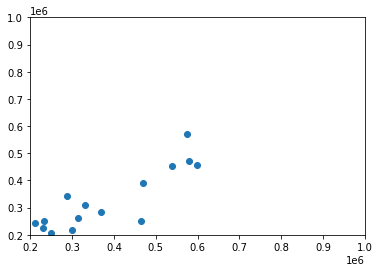

In [120]:
plt.scatter(y_test, predictions)
plt.ylim([200000,1000000])
plt.xlim([200000,1000000])

In [121]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

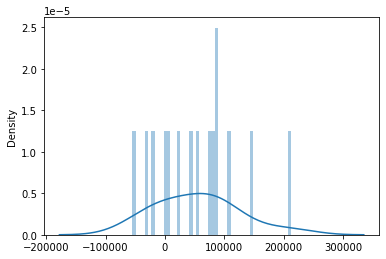

In [122]:
sns.distplot((y_test-predictions),bins=50)

In [123]:
from sklearn import metrics

In [124]:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 68295.66372757069
MSE: 7611089615.010205
RMSE: 87241.55899002611


In [125]:
pred = lin_reg.predict(X_test)

In [126]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 68295.66372757069
MSE: 7611089615.010205
RMSE: 87241.55899002611
R2 Square 0.5888107938859346
__________________________________
Train set evaluation:
_____________________________________
MAE: 43148.04632147482
MSE: 2922881001.7465525
RMSE: 54063.67543690081
R2 Square 0.7667816361506368
__________________________________


<img src="https://www.vectorlogo.zone/logos/linkedin/linkedin-tile.svg" align='left' alt="plotly" width="60" height="60"/> </a><a> 
[Msc. Diego Hurtado](https://www.linkedin.com/in/diegohurtadoo/)

<img src="https://www.vectorlogo.zone/logos/medium/medium-tile.svg" align='left' alt="plotly" width="60" height="60"/> </a><a> 
[Msc. Diego O’HURTADO](https://medium.com/@diego.hurtado.olivares)

<img src="https://raw.githubusercontent.com/DiegoHurtad0/Covid-19-Dataset-Mexico/master/wave.svg" width="900" height="600">

[Msc. Diego Hurtado](https://www.linkedin.com/in/diegohurtadoo/)